Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics

In [6]:
df = pd.read_csv('/Users/ghost/Documents/69/Kuek/Gisma/Machine Learning/teaching-main/datasets/adult.csv')

In [10]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Buiness Problem Understanding
Data collection

In [14]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df size: (32561, 15)
df_train size: (24420, 15)
df_test size: (8141, 15)


Data Exploration

In [18]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

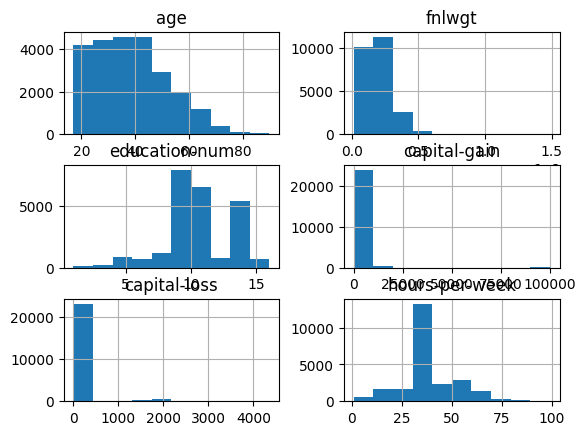

In [20]:
df_train.hist()

<Axes: xlabel='workclass'>

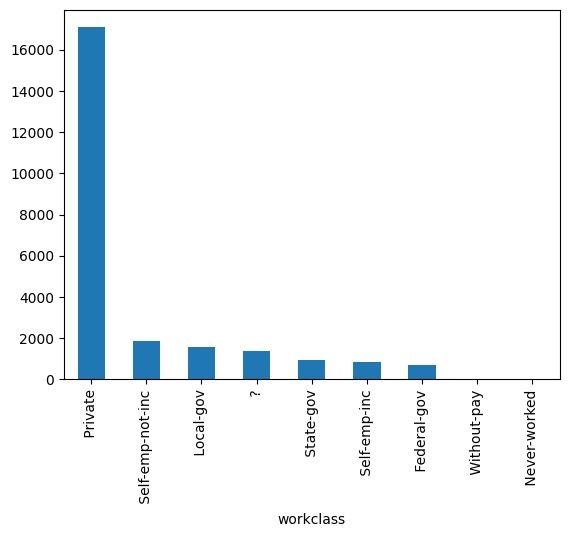

In [22]:
df_train['workclass'].value_counts().plot(kind='bar')

<Axes: xlabel='target'>

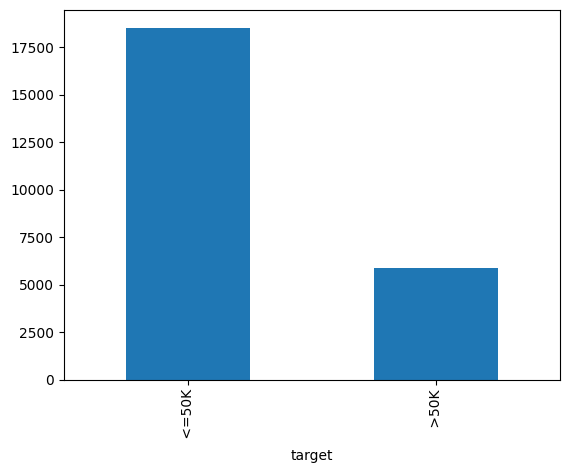

In [24]:
df_train['target'].value_counts().plot(kind='bar')

In [27]:
df_train['workclass'].unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

DATA PREPROCESSING

In [31]:
# Replace '?' with np.nan (Not a Number), which is standard for missing values in pandas
df_train = df_train.replace(' ?', np.nan)
df_test = df_test.replace(' ?', np.nan)

# Drop rows with any column having NaN
df_train = df_train.dropna()
df_test = df_test.dropna()

# Print the size of the dataframes
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (22617, 15)
df_test size: (7545, 15)


In [34]:
x_train = df_train.drop("target", axis=1)
y_train = df_train["target"]


x_test = df_test.drop("target", axis=1)
y_test = df_test["target"]

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)

print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (22617, 14)
y_train size: (22617,)
x_test size: (7545, 14)
y_test size: (7545,)


FEATURE ENGINEERING

In [38]:
# Specify columns by data type
categorical_attributes = x_train.select_dtypes(include=["object"]).columns
numerical_attributes = x_train.select_dtypes(include=["int64"]).columns 

# Create a ColumnTransformer to apply different preprocessing to different columns
ct = sklearn.compose.ColumnTransformer(
    [
        ("scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
        ("encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
    ]
)

# Fit the ColumnTransformer on the training data and transform it
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

# Printing shapes of the transformed arrays
print("x_train size:", x_train.shape)
print("x_test size:", x_test.shape)

x_train size: (22617, 104)
x_test size: (7545, 104)


Model Training

In [42]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

Model  Evaluation

In [45]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy

0.8489065606361829

EXAMPLE 2